In [1]:
import os
import pickle

# Functions from other notebook file.
from ipynb.fs.full.shared_functions_server import *

In [2]:
# Move one directory back to the project root.
os.chdir("..")

In [3]:
# Suppress tensorflow log messages.
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [4]:
# GLOBALS
DATA_DIRECTORY = os.path.join(os.getcwd() + '/datasets/vgg-double-digit-validation')
BATCH_SIZE = 128

IMAGE_HEIGHT = 100
IMAGE_WIDTH = 100
IMAGE_CHANNELS = 3

CATEGORIES = 10 # represents digits 0-9
DIMENSIONS = 2 

---
## Evaluate Model History

In [5]:
# Open serialized training history data for VGG-16 model.
with open(r'model-info/vgg-16-double-digit-history', "rb") as input_file:
            history = pickle.load(input_file, encoding='bytes')

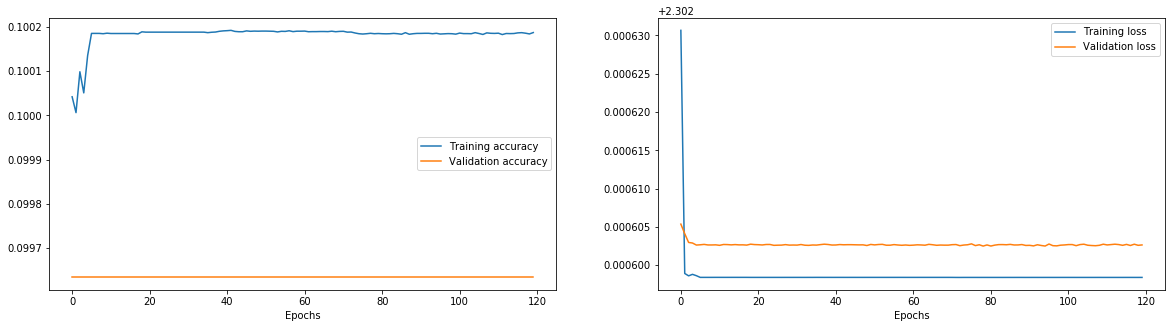

In [6]:
# Plot the training history.
figure, axes = pyplot.subplots(1, 2, figsize=(20, 5))

axes[0].plot(history[b'acc'], label='Training accuracy')
axes[0].plot(history[b'val_acc'], label='Validation accuracy')
axes[0].set_xlabel('Epochs')
axes[0].legend() 

axes[1].plot(history[b'loss'], label='Training loss')
axes[1].plot(history[b'val_loss'], label='Validation loss')
axes[1].set_xlabel('Epochs')
axes[1].legend()

---
## Evaluate Model Performance

In [7]:
model = models.load_model('model-info/vgg-16-double-digit')
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 5

In [8]:
data_frame = create_captcha_dataframe(DATA_DIRECTORY)
data_frame.head()

,label,file
0,80,/home/tkimbr1/repositories/captcha-tensorflow/...
1,12,/home/tkimbr1/repositories/captcha-tensorflow/...
2,98,/home/tkimbr1/repositories/captcha-tensorflow/...
3,92,/home/tkimbr1/repositories/captcha-tensorflow/...
4,86,/home/tkimbr1/repositories/captcha-tensorflow/...


In [9]:
shuffled_indices = numpy.random.permutation(len(data_frame))
print('Test set:', len(shuffled_indices))

Test set: 200


In [10]:
testing_set_generator = get_captcha_generator(data_frame, shuffled_indices, 
                                              for_training=False, batch_size=BATCH_SIZE)

dict(zip(model.metrics_names, model.evaluate(testing_set_generator, steps=len(shuffled_indices)//128)))

1/1 [==============================] - 2s 2s/step - loss: 2.3024 - acc: 0.1211


{'acc': 0.12109375, 'loss': 2.3023507595062256}

In [11]:
testing_set_generator = get_captcha_generator(data_frame, shuffled_indices, 
                                              for_training=False, batch_size=BATCH_SIZE)
captcha_images, captcha_text = next(testing_set_generator)

predictions = model.predict_on_batch(captcha_images)

true_values = tensorflow.math.argmax(captcha_text, axis=-1)
predictions = tensorflow.math.argmax(predictions, axis=-1)

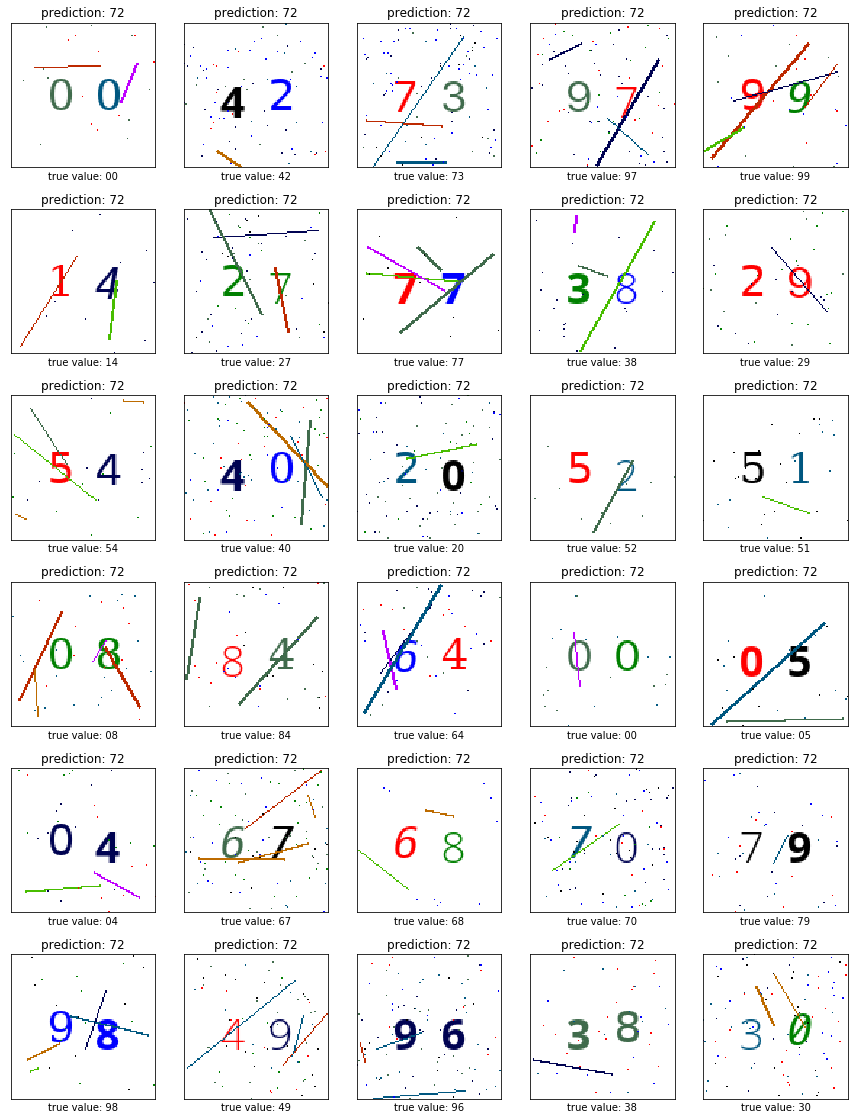

In [12]:
display_predictions_from_model(captcha_images, 
                               predictions, 
                               true_values)